## Team :
1. Muhammad Fernanda Naufal Fathoni 
2. Ica Nur Cahyani
3. Tarissa Aura

Python for Data Science - Kampus Merdeka


##### Permasalahan 
  dataset weatherAUS adalah sebuah data yang berisikan informasi informasi cuaca di Australia. Data tersebut merupakan observasi dari beberapa lokasi di australia. Data tersebut berisikan informasi informasi yang menunjang apakah akan terjadinya hujan seperti suhu, kecepatan angin, kelembapan. 

  Tujuan dari data ini adalah untuk membuat sebuah prediksi apakah hari selanjutnya akan terjadi hujan berdasarkan data data yang sudah ada. variabel y pada data ini adalah kolom 'RainTomorrow' yang menunjukkan apakah hari esok ujan atau tidak. 
  
  Tugas dari Final Project 2 kali ini adalah membuat sebuah model Logistic regression dan SVM dengan menggunakan data weatherAUS tersebut. Data tersebut didapatkan dari kaggle. Selain membuat model, data tersebut juga bisa digunakan untuk membuat analisa analisa yang berkaitan dengan cuaca di australia. 

  Dalam membuat sebuah model regresi dilakukan pemeriksaan data mulai dari pembersihan seperti pengecekan data kosong, data outlier, serta melakukan variabel variabel yang berkorelasi dengan price tersebut

Final project ini membuat sebuah model regresi yang dirancang untuk memprediksi apakah hari esok hujan atau tidak

Hal hal yang dilakukan dalam membuat model :
1. Import Library
2. Import Dataset
3. Data cleaning
4. EDA
5. Preprocessing
6. Model 
7. Model Inference

# Import Library

In [1]:
#for data prepocessing
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

#for encoding categorical data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#for splitting data into train and test and cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

#for building model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#for evaluating model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

#for ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import Dataset

In [2]:
df = pd.read_csv("data/weatherAUS.csv")
#Supaya kolom terdisplay semua
pd.set_option('display.max.columns',60)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Cleaning

## Melihat Informasi Kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Penjelasan Data
Dataset tersebut terdiri dari 22 Kolom dengan tipe data object dan float
Data data tersebut sebagai berikut :
1. Date  : Hari
2. Location  : Lokasi 
3. MinTemp : Temperatur terendah dalam celcius
4. MaxTemp : Temperatur tertinggi dalam celcius
5. Rainfall : jumlah curah hujan dalam mm
6. Evaporation : Jumlah Evaporasi 
7. Sunshine : Jumlah jam cerah
8. WindGustDir : arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam
9. WindGustSpeed : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam
10. WindDir9am : Arah angin jam 9 pagi
11. WindDir3pm : Arah angin jam 3 sore
12. WindSpeed9am : Kecepatan angin jam 9 pagi
13. WindSpeed3pm : Kecepatan angin jam 3 sore
14. Humidity9am : humiditas jam 9 pagi dalam persen
15. Humidity3pm : humiditas jam 3 sore dalam persen
16. Pressure9am : tekanan udara jam 9 pagi
17. Pressure3pm : Tekanan udara jam 3 sore
18. Cloud9am : Presentase langit tertutup awan jam 9 pagi
19. Cloud3pm : Presentase langit tertutup awan jam 3 sore
20. Temp9am : Temperature jam 9 pagi dalam celcius
21. Temp3pm : Temperature jam 3 sore dalam celcius
20. RainToday : Jika hujan 24jam sebelum jam 9pagi melebihi 1, maka nilai 1, jika tidak maka 0
22. RainTomorrow : Variabel yang akan di prediksi

## Melihat Jumlah Baris dan Kolom

In [4]:
df.shape

(145460, 23)

## Melihat jumlah unique pada masing masing kolom

In [5]:
for col in df.columns:
    print(col,': ', df[col].nunique())

Date :  3436
Location :  49
MinTemp :  389
MaxTemp :  505
Rainfall :  681
Evaporation :  358
Sunshine :  145
WindGustDir :  16
WindGustSpeed :  67
WindDir9am :  16
WindDir3pm :  16
WindSpeed9am :  43
WindSpeed3pm :  44
Humidity9am :  101
Humidity3pm :  101
Pressure9am :  546
Pressure3pm :  549
Cloud9am :  10
Cloud3pm :  10
Temp9am :  441
Temp3pm :  502
RainToday :  2
RainTomorrow :  2


## Melihat missing value

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Presentase Missing Value

In [7]:
for col in df.columns:
    jumlah_null = df[col].isnull().sum()
    total = len(df[col])
    presentase = (jumlah_null/total)*100
    
    print(f'Kolom {col}')
    print(f'Jumlah null: {jumlah_null}')
    print(f'Presentase null : {presentase:.2f}%\n')

Kolom Date
Jumlah null: 0
Presentase null : 0.00%

Kolom Location
Jumlah null: 0
Presentase null : 0.00%

Kolom MinTemp
Jumlah null: 1485
Presentase null : 1.02%

Kolom MaxTemp
Jumlah null: 1261
Presentase null : 0.87%

Kolom Rainfall
Jumlah null: 3261
Presentase null : 2.24%

Kolom Evaporation
Jumlah null: 62790
Presentase null : 43.17%

Kolom Sunshine
Jumlah null: 69835
Presentase null : 48.01%

Kolom WindGustDir
Jumlah null: 10326
Presentase null : 7.10%

Kolom WindGustSpeed
Jumlah null: 10263
Presentase null : 7.06%

Kolom WindDir9am
Jumlah null: 10566
Presentase null : 7.26%

Kolom WindDir3pm
Jumlah null: 4228
Presentase null : 2.91%

Kolom WindSpeed9am
Jumlah null: 1767
Presentase null : 1.21%

Kolom WindSpeed3pm
Jumlah null: 3062
Presentase null : 2.11%

Kolom Humidity9am
Jumlah null: 2654
Presentase null : 1.82%

Kolom Humidity3pm
Jumlah null: 4507
Presentase null : 3.10%

Kolom Pressure9am
Jumlah null: 15065
Presentase null : 10.36%

Kolom Pressure3pm
Jumlah null: 15028
Presen

## Cek data duplikat

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# DATA CLEANING

## Copy dataset sebelum di cleaning

In [10]:
data_cleaning = df.copy()

## Hapus missing value diatas 20%
Dilakukan penghapusan pada kolom yang memiliki missing value diatas 20 persen karena akan mengganggu pada mode. Kolom yang dihapus sebagai berikut:
1. Sunshine dengan missing value 48.01%
2. Evaporation dengan missing value 43.17%
3. Cloud9am dengan missing value 38.17%
4. Cloud3pm dengan missing value 40.81%

## Drop missing value diatas 20%


In [11]:
data_cleaning.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
data_cleaning.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'],axis=1, inplace=True)

In [13]:
data_cleaning.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [14]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [15]:
data_cleaning.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Isi missing value numerik dengan mean dan object dengan Mode

In [16]:
# Mengisi baris yang merupakan missing value
float_cols = data_cleaning.select_dtypes(include = ['float']).columns
cat_var = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in float_cols:
    data_cleaning[col] = data_cleaning[col].fillna(data_cleaning[col].mean())
for col in cat_var :
    data_cleaning[col] = data_cleaning[col].fillna(data_cleaning[col].mode()[0])

In [17]:
data_cleaning.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

## Drop missing value pada target

In [18]:
data_cleaning = data_cleaning[data_cleaning['RainTomorrow'].notna()] 
data_cleaning.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

# Explorasi Data Analysis
Pada explorasi yang dilakukan dengan mencari variabel x yang memiliki pengaruh atau korelasi terhadap variabel tarjet 'RainTomorrow'


# HEAT MAP

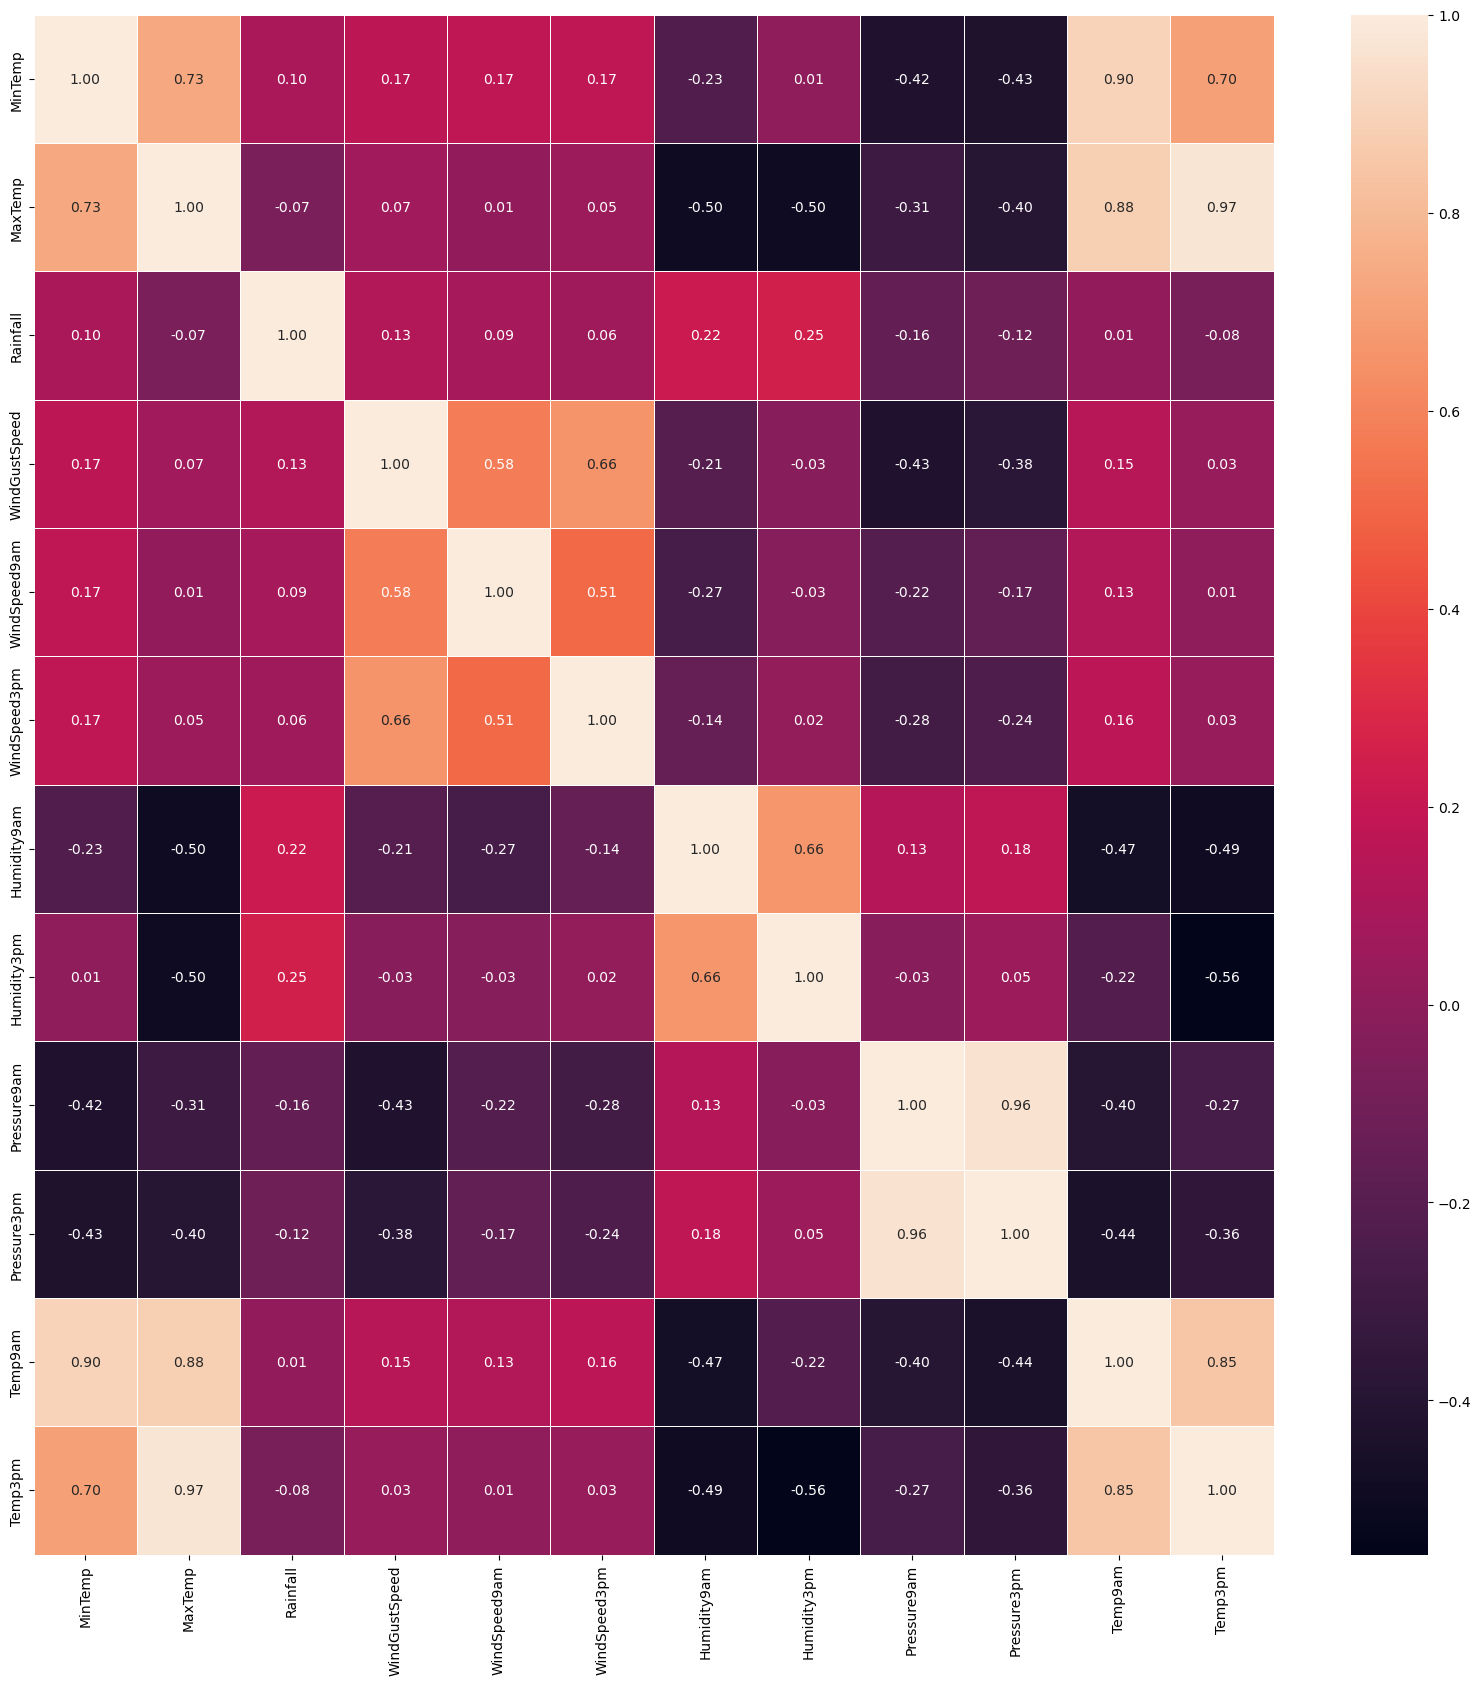

In [20]:
# Mengecek matrix korealsi kembali
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(data_cleaning.corr(), linewidths = .5, annot=True, fmt='.2f')

In [21]:
data_cleaning.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


## Analisa Rain Tomorrow sebagai Target

In [22]:
rain_tomorrow_type = data_cleaning['RainTomorrow'].value_counts(normalize=True)
rain_tomorrow_type

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

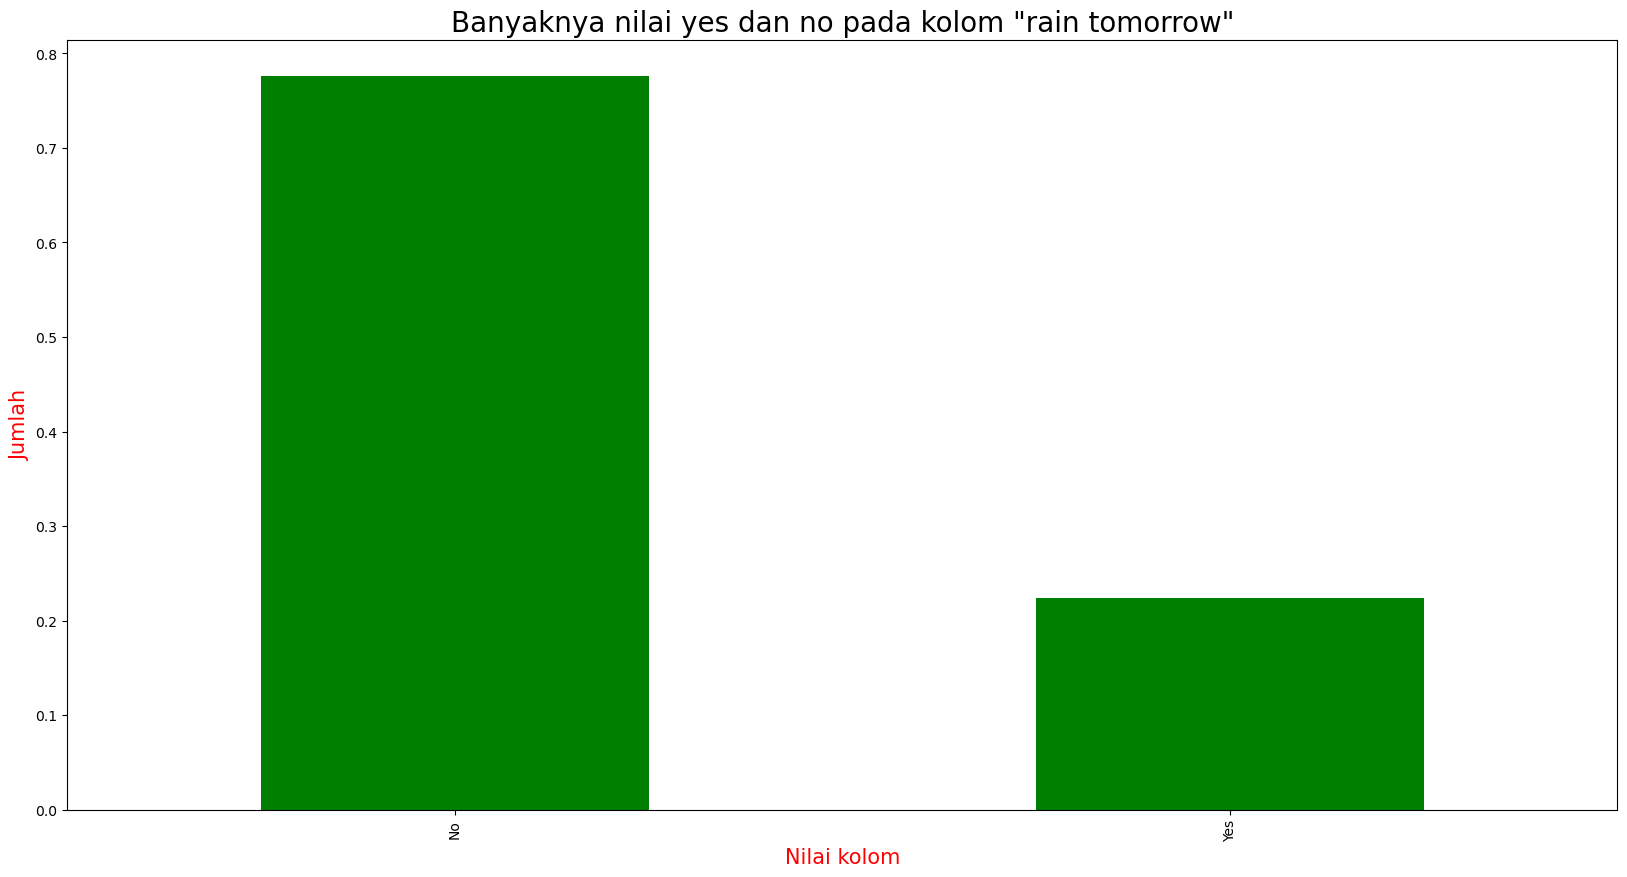

In [23]:
# inisiasi bentuk bar
rain_tomorrow_type.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Banyaknya nilai yes dan no pada kolom "rain tomorrow"', fontsize = 20)
# nama xlabel
plt.xlabel('Nilai kolom', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

### Keterangan Kolom Rain Tomorrow 
- Pada kolom rain tomorrow terdiri dari 2 nilai yaitu yes dan no
- yes merupakan isi kolom hujan pada hari esok
- no adalah isi kolom tidak hujan
- Kolom rain tomorrow bernilai no berjumlah 77.6%
- Kolom rain tomorrow bernilai yes berjumlah 22.4%


## Pengaruh Kolom Date Terhadap Rain Tomorrow

In [24]:
korelasi_date = data_cleaning.loc[:, [ 'Date', 'RainTomorrow']]
korelasi_date

,Date,RainTomorrow
0,2008-12-01,No
1,2008-12-02,No
2,2008-12-03,No
3,2008-12-04,No
4,2008-12-05,No
...,...,...
145454,2017-06-20,No
145455,2017-06-21,No
145456,2017-06-22,No
145457,2017-06-23,No


In [25]:
#encode
label_encode = preprocessing.LabelEncoder()

#menyalin data pada variabel cuaca_encode
korelasi_date_encode = korelasi_date.copy()

for col in korelasi_date.select_dtypes(include='O').columns:
    korelasi_date_encode[col]=label_encode.fit_transform(korelasi_date[col])

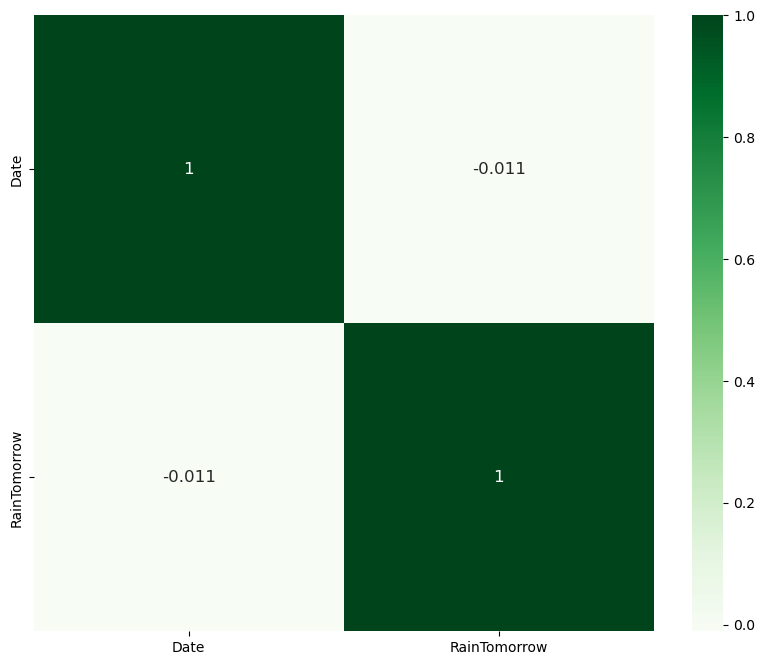

In [26]:
matriksKorelasiMM = korelasi_date_encode.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

### Keterangan Kolom date dengan rain tomorrow
Pada kolom date berisikan data hari hujan. pada saat dilakukan pengecekan korelasi, nilai dari korelasi tersebut sangatlah kecil. Maka dari itu kelompok kami tidak menjadikan kolom date sebagai features


## Pengaruh rainfall Terhadap Rain Tomorrow
Rainfall merupakan jumlah curah hujan pada hari tersebut

In [27]:
label_encoder = preprocessing.LabelEncoder()
data_cleaning['RainTomorrow']= label_encoder.fit_transform(data_cleaning['RainTomorrow'])

In [28]:
korelasi_rainfall = data_cleaning.loc[:, [ 'Rainfall', 'RainTomorrow']]
korelasi_rainfall

,Rainfall,RainTomorrow
0,0.6,0
1,0.0,0
2,0.0,0
3,0.0,0
4,1.0,0
...,...,...
145454,0.0,0
145455,0.0,0
145456,0.0,0
145457,0.0,0


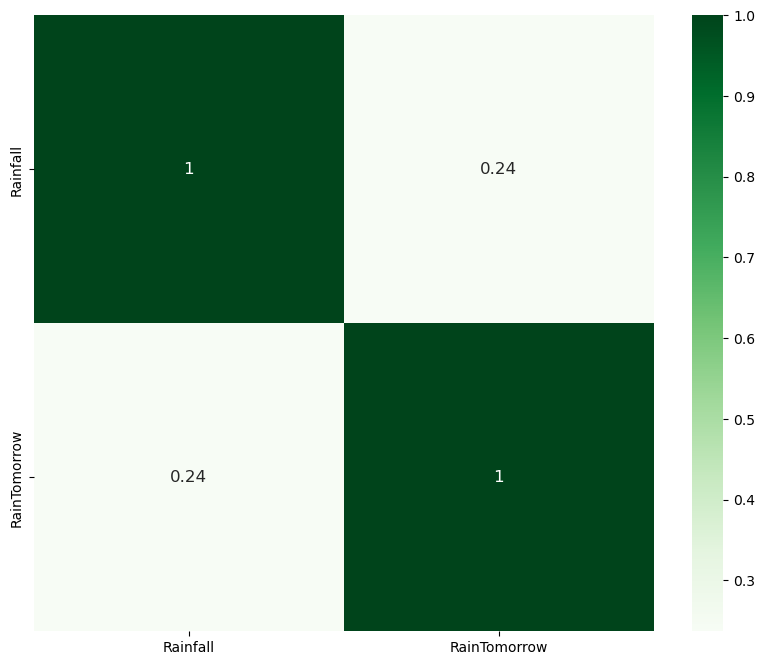

In [29]:
matriksKorelasi = korelasi_rainfall.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

### Kesimpulan Kolom rainfall dengan rain tomorrow
Pada kolom rainfall merupakan isi dari curah hujan dalam mm. Pada kolom rainfal memiliki korelasi yang positif terhadap rain tomorrow jadi bisa jadi mempengaruhi hasil dari rain tomorrow

## Pengaruh Kolom yang mengandung kata Wind Terhadap Rain Tomorrow
Pada beberapa kolom mengandung unsur wind mulai dari kecepatan angin, arah angin, dan waktu terjadinya angin tersebut. Kami menyimpulkan untuk mengelompokkan menjadi sebuah variabel yang mengandung unsur unsur tersebut untuk di analisa

#### Mengubah data arah angin dengan busur derajat arah angin
Data WindGustDir, WindDir3pm dan WindDir9am merupakan data sebuah arah angin. Data data tersebut bisa diubah menjadi sebuah derajat pada mata angin.

In [30]:
data_cleaning['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [31]:
data_cleaning['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [32]:
data_cleaning['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [33]:
arah_angin = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
              'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 
              'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 
              'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
#pada ubah data
data_cleaning['WindGustDir'] = data_cleaning['WindGustDir'].map(arah_angin)
data_cleaning['WindDir9am'] = data_cleaning['WindDir9am'].map(arah_angin)
data_cleaning['WindDir3pm'] = data_cleaning['WindDir3pm'].map(arah_angin)

### Slicing data unsur wind 

In [34]:
korelasi_wind = data_cleaning.loc[:, [ 'WindGustDir', 'WindGustSpeed', 'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','RainTomorrow']]
korelasi_wind

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainTomorrow
0,270.0,44.0,270.0,292.5,20.0,24.0,0
1,292.5,44.0,337.5,247.5,4.0,22.0,0
2,247.5,46.0,270.0,247.5,19.0,26.0,0
3,45.0,24.0,135.0,90.0,11.0,9.0,0
4,270.0,41.0,67.5,315.0,7.0,20.0,0
...,...,...,...,...,...,...,...
145454,90.0,31.0,112.5,90.0,15.0,13.0,0
145455,90.0,31.0,135.0,67.5,13.0,11.0,0
145456,337.5,22.0,135.0,0.0,13.0,9.0,0
145457,0.0,37.0,135.0,292.5,9.0,9.0,0


### Tabel korelasi wind dan rain tomorrow

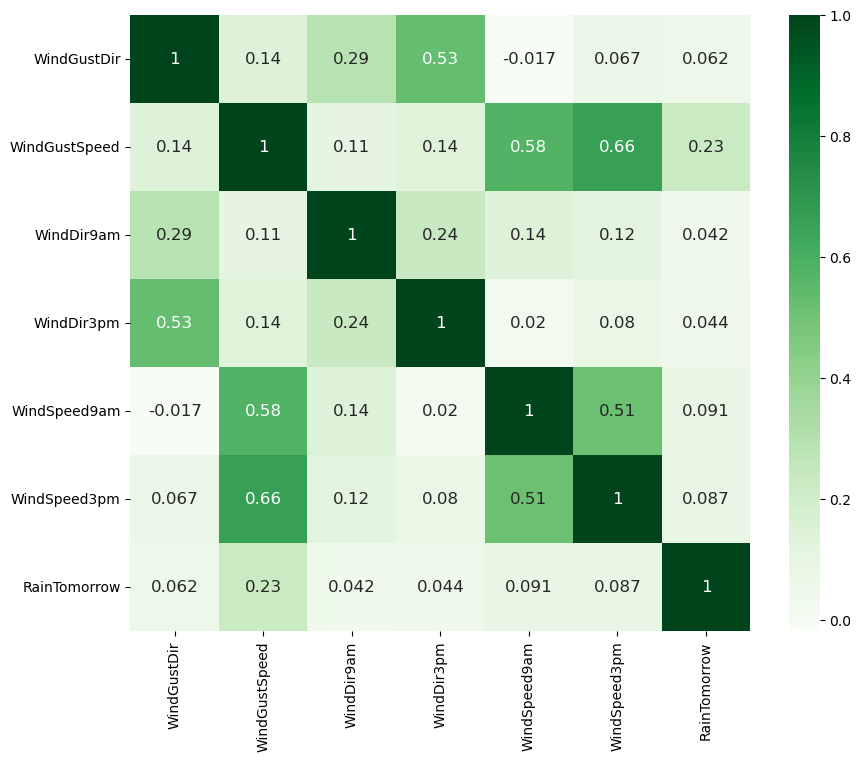

In [35]:
matriksKorelasi = korelasi_wind.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

### Kesimpulan Kolom yang mengandung kata Wind Terhadap Rain Tomorrow
- Kolom yang mengandung unsur wind berjumlah 6 kolom
- Kolom WindGustDir, WindDir9am, dan WindDir3pm adalah kolom mengenai Arah angin
- Kolom WindGustSpeed, WindSpeed9am, dan WindSpeed3pm adalah kolom mengenai kecepatan angin
- Korelasi paling tinggi terhadap rain tomorrow adalah kolom WindGustSpeed. jadi wind gust speed sudah cukup mewakili kolom dengan unsur angin yang lain
- Wind GustDir memiliki korelasi yang rendsah sehingga tidak digunakan sebagai feature

- Kami menyimpulkan kolom wind gust speed sudah cukup untuk mewakili kolom kolom lain


## Pengaruh 'MinTemp', 'MaxTemp', 'Temp9am', dan 'Temp3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'MinTemp', 'MaxTemp', 'Temp9am', dan 'Temp3pm' mempengaruhi kolom 'RainTomorrow'
Kami menggabungkan beberapa kolom yang mengandung unsur temp karena berkaitan dengan suhu

### Rata rata 'MinTemp', 'MaxTemp', Temp9am, dan Temo3pm terhadap Rain Tomorrow

In [36]:
data_cleaning.groupby("RainTomorrow")[["MinTemp","MaxTemp", "Temp9am", "Temp3pm"]].mean()

,MinTemp,MaxTemp,Temp9am,Temp3pm
RainTomorrow,,,,
0,11.898916,23.834758,17.076527,22.389965
1,13.181440,21.122727,16.679534,19.254986


### Scatter Plot 'Temp9am' dan 'Temp3pm' terhadap Rain Tomorrow

Text(0.5, 1.0, 'Hubungan Temp 3pm dan 9am dengan RainTomorrow')

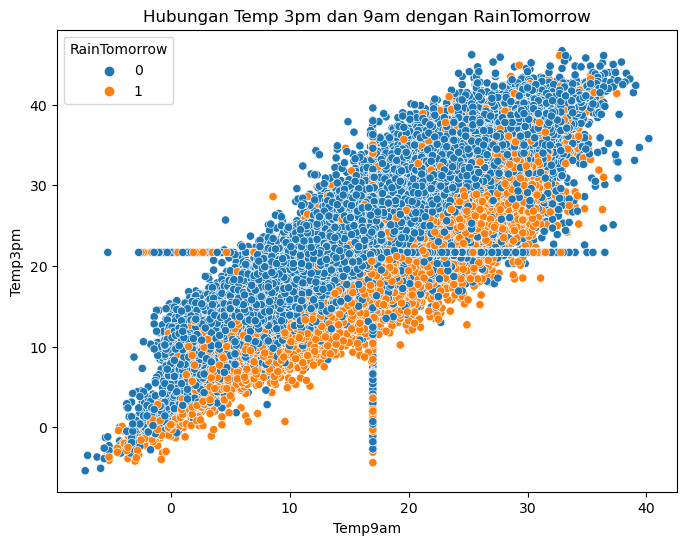

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Temp9am", y="Temp3pm", hue = "RainTomorrow", data=data_cleaning)
plt.title("Hubungan Temp 3pm dan 9am dengan RainTomorrow")

### Scatter Plot 'MinTemp' dan 'MaxTemp' terhadap Rain Tomorrow

Text(0.5, 1.0, 'Hubungan MinMaxTemperature dengan RainTomorrow')

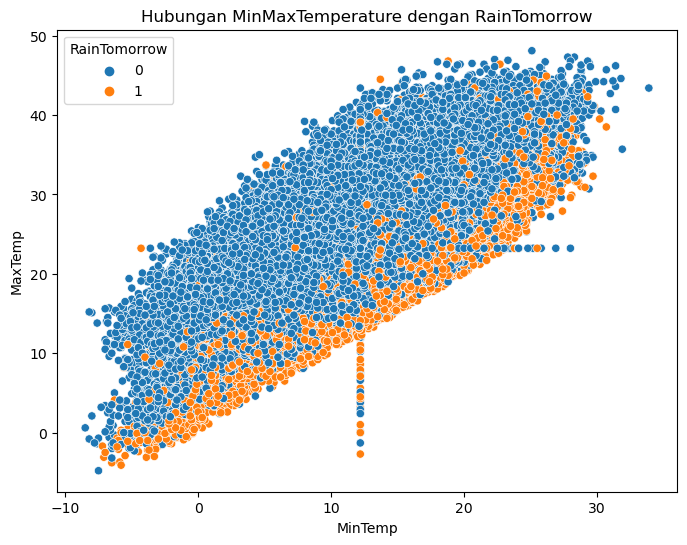

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="MinTemp", y="MaxTemp", hue = "RainTomorrow", data=data_cleaning)
plt.title("Hubungan MinMaxTemperature dengan RainTomorrow")

### Heat map MinTemp, MaxTemp, Temp9am, Temp3pm dan RainTomorrow


In [39]:
korelasi_MinMaxTemp = data_cleaning.loc[:, [ 'MinTemp', 'MaxTemp', "Temp9am", "Temp3pm", 'RainTomorrow']]
korelasi_MinMaxTemp 

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,16.9,21.8,0
1,7.4,25.1,17.2,24.3,0
2,12.9,25.7,21.0,23.2,0
3,9.2,28.0,18.1,26.5,0
4,17.5,32.3,17.8,29.7,0
...,...,...,...,...,...
145454,3.5,21.8,9.4,20.9,0
145455,2.8,23.4,10.1,22.4,0
145456,3.6,25.3,10.9,24.5,0
145457,5.4,26.9,12.5,26.1,0


In [40]:
#encode
label_encode = preprocessing.LabelEncoder()

#menyalin data pada variabel cuaca_encode
korelasiMinMaxTemp_encode = korelasi_MinMaxTemp.copy()

for col in korelasi_MinMaxTemp.select_dtypes(include='O').columns:
    korelasiMinMaxTemp_encode[col]=label_encode.fit_transform(korelasi_MinMaxTemp[col])

In [41]:
korelasiMinMaxTemp_encode

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,16.9,21.8,0
1,7.4,25.1,17.2,24.3,0
2,12.9,25.7,21.0,23.2,0
3,9.2,28.0,18.1,26.5,0
4,17.5,32.3,17.8,29.7,0
...,...,...,...,...,...
145454,3.5,21.8,9.4,20.9,0
145455,2.8,23.4,10.1,22.4,0
145456,3.6,25.3,10.9,24.5,0
145457,5.4,26.9,12.5,26.1,0


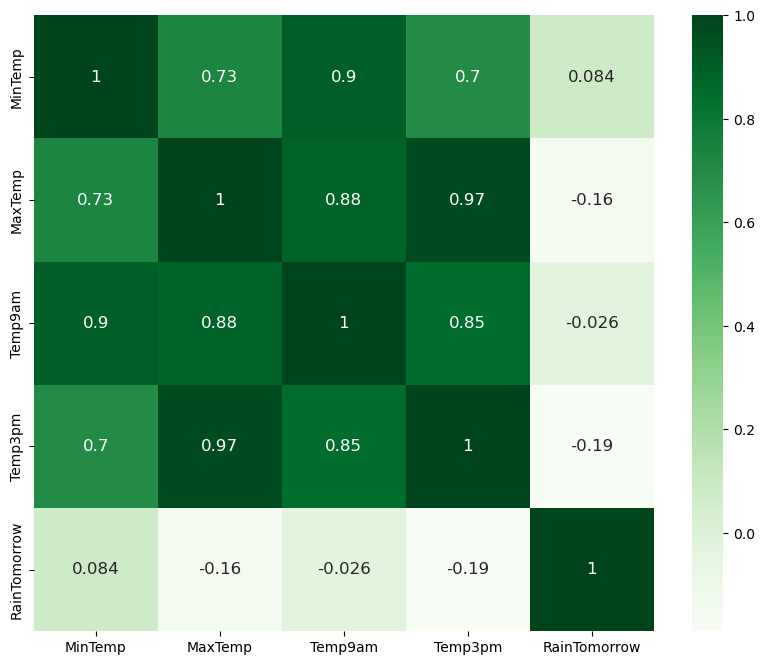

In [42]:
matriksKorelasi = korelasiMinMaxTemp_encode.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

## Kesimpulan korelasi MinTemp MaxTemp dan RainTomorrow
- MinTemp adalah kolom berisikan temperature terendah hari itu
- MaxTemp adalah temperature tertinggi pada hari itu
- Rata rata MinTemp jika besok hujan didapatkan suhu 13.181440
- Rata rata MinTemp jika besok tidak hujan didapatkan 11.898916
- Rata rata Temp 9am jika besok tidak hujan didapatkan 17.076527
- Rata rata Temp 9am jika besok  hujan didapatkan 16.679534
- Rata rata Temp 3pm jika besok tidak hujan didapatkan 22.389965
- Rata rata temp 3pm jika besok hujan didapatkan 19.254986
- Rata rata MaxTemp jika besok hujan didapatkan suhu 23.834758
- Rata Rata MaxTemp jika besok tidak hujan didapatkan 23.834758
- Pada heatmap didapatkan bahwa korelasi MinTemp dan RainTomorrow berkorelasi positif
- Pada heatmap korelasi MaxTemp dan RainTomorrow berkorelasi negatif
- Pada heatmap didapatkan korelasi yang lemah terhadap rain romorrow 

Kami simpulkan bahwa kolom kolom temp9am, dan temp3pm tidak mempengaruhi hujan pada esok hari jadi tidak dijadikan sebagai feature. Sedangkan pada kolom MinTemp dan Max Temp sudah mewakili kolom temp9am dan 3pm sehingga yang digunakan sebagai feature adalah MinTemp dan MaxTemp

## Pengaruh Location Terhadap RainTomorrow
Dilakukan analisa apakah kolom Location' apakah mempengaruhi kolom 'RainTomorrow'

In [43]:
data_cleaning['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [44]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_location = data_cleaning.groupby('Location').size()
sum_location

Location
Adelaide            3090
Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville      

In [45]:
# Hitung jumlah kejadian "RainTomorrow" yang sama dengan "Yes" untuk setiap lokasi
df_rain_tomorrow_yes = df.loc[df['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].count().reset_index(name='Yes')
df_rain_tomorrow_yes = df_rain_tomorrow_yes.sort_values(by='Yes', ascending=False)


 Top 5 YES 
        Location   Yes
33      Portland  1095
8         Cairns   950
43       Walpole   949
12      Dartmoor   922
22  MountGambier   920


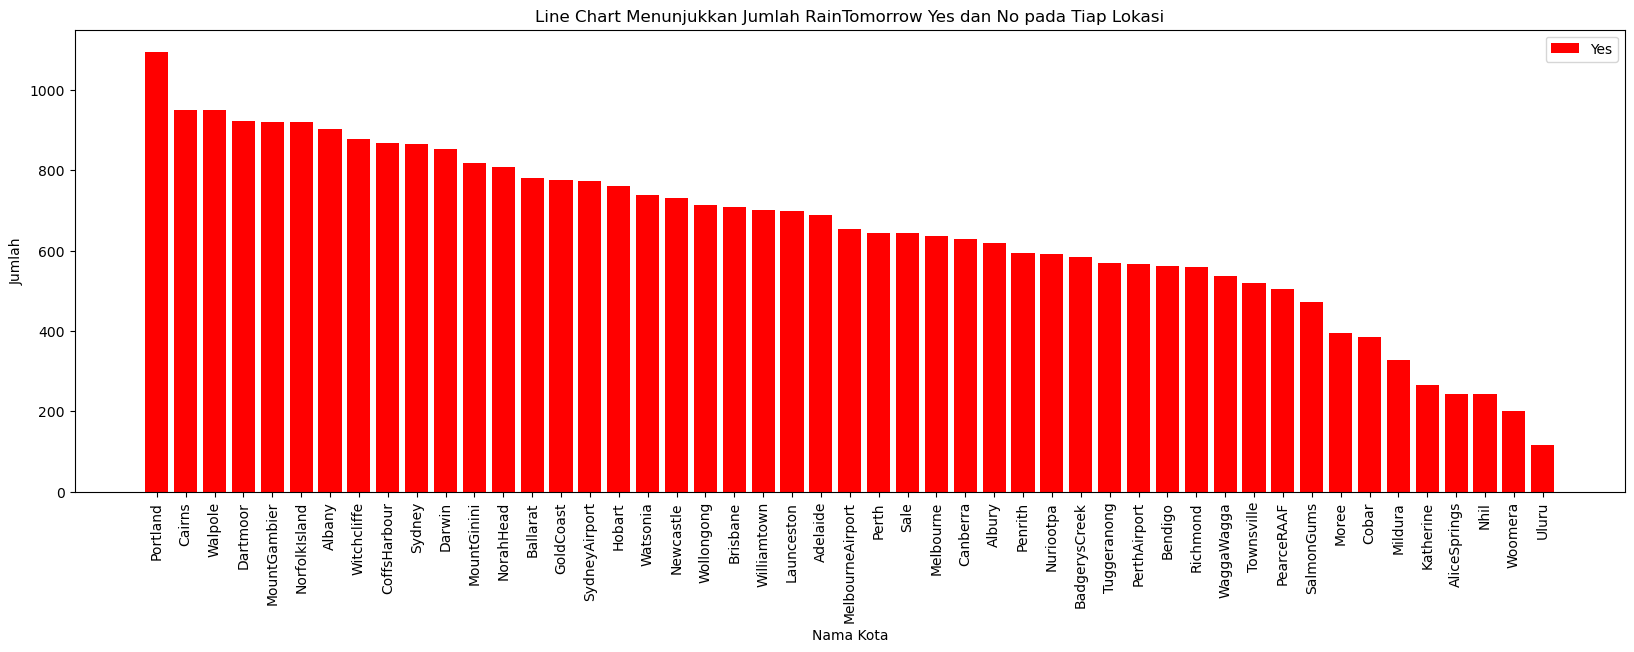

In [46]:
# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

print(" Top 5 YES ")
print(df_rain_tomorrow_yes.head())
plt.show()

## Kesimpulan Location dan RainTomorrow
Pada kolom location berisikan data kota kota pada australia. Data kota tersebut berisikan nama kota yang berhubungan dengan kolom RainTomorrow. Dalam nama kota tersebut didapatkan bahwa terjadinya hujan pada setiap kota berbeda beda. Jadi kami simpulkan Location menjadi feature pada model yang akan dibuat karena location mempengaruhi pada raintomorrow

## Pengaruh 'Humidity9am' dan 'Humidity3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'Humidity9am' dan 'Humidity3pm' mempengaruhi kolom 'RainTomorrow'. Kolom tersebut kami pilih karena sama sama mengandung unsur humidity, Akan tetapi jamnya saja yang berbeda

In [47]:
korelasi_humidity = data_cleaning.loc[:, [ 'Humidity9am', 'Humidity3pm', 'RainTomorrow']]
korelasi_humidity 

,Humidity9am,Humidity3pm,RainTomorrow
0,71.0,22.0,0
1,44.0,25.0,0
2,38.0,30.0,0
3,45.0,16.0,0
4,82.0,33.0,0
...,...,...,...
145454,59.0,27.0,0
145455,51.0,24.0,0
145456,56.0,21.0,0
145457,53.0,24.0,0


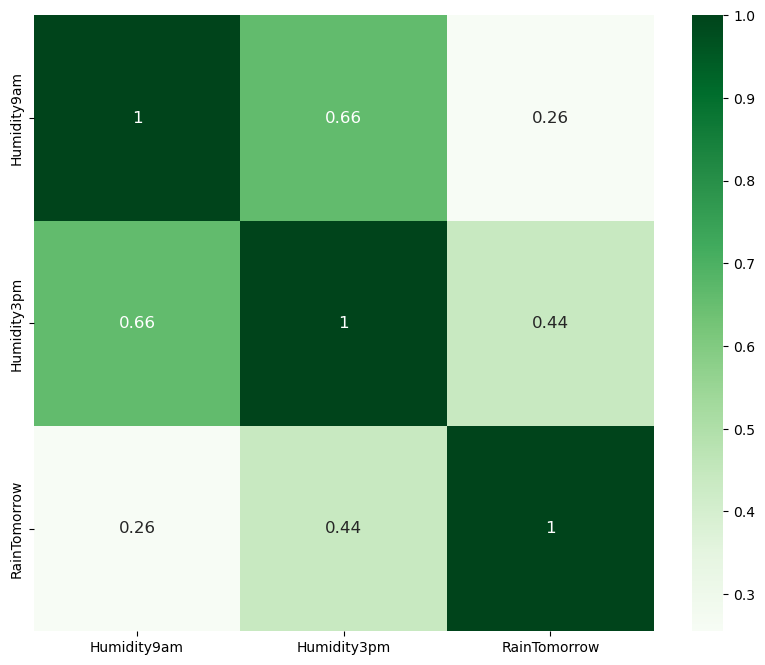

In [48]:
matriksKorelasi = korelasi_humidity.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

## Kesimpulan Humidity3pm, humidity9am dan RainTomorrow
Pada kolom Humidity pukul 9 dan pukul 3 menunjukkan korelasi positif, akan tetapi pada kolom kolom lain yang mengandung unsur jam 9 dan 3 kebanyakan korelasinya tidak akurat sehingga tidak diambil sebagai feature. 

## Pengaruh 'Pressure9am' dan 'Pressure3pm' Terhadap RainTomorrow
Dilakukan analisa apakah kolom 'Pressure9am' dan 'Pressure3pm' mempengaruhi kolom 'RainTomorrow'

In [49]:
korelasi_pressure = data_cleaning.loc[:, [ 'Pressure9am', 'Pressure3pm', 'RainTomorrow']]
korelasi_pressure 

,Pressure9am,Pressure3pm,RainTomorrow
0,1007.7,1007.1,0
1,1010.6,1007.8,0
2,1007.6,1008.7,0
3,1017.6,1012.8,0
4,1010.8,1006.0,0
...,...,...,...
145454,1024.7,1021.2,0
145455,1024.6,1020.3,0
145456,1023.5,1019.1,0
145457,1021.0,1016.8,0


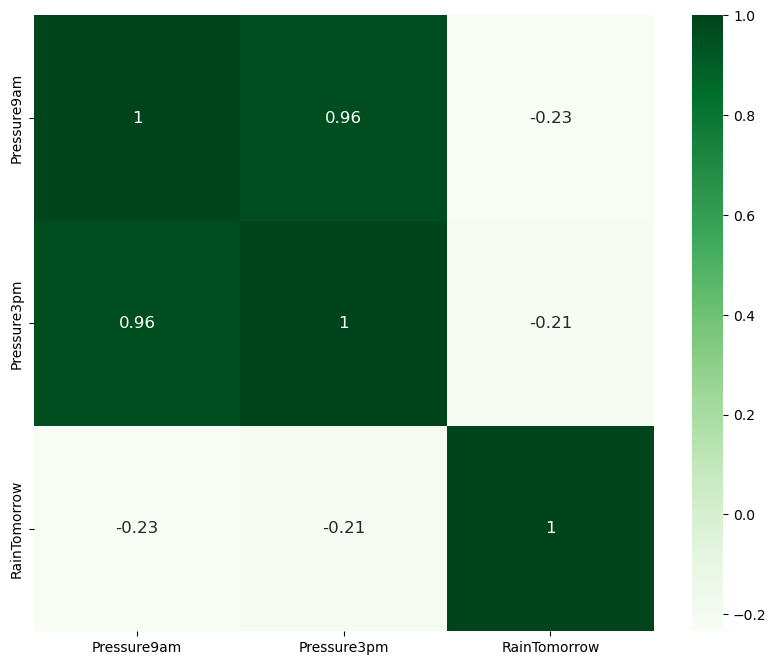

In [50]:
matriksKorelasi = korelasi_pressure.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasi, cmap='Greens', annot=True, annot_kws={'fontsize':12})
plt.show()

## Kesimpulan Pressure dan RainTomorrow
Pada kolom pressure3pm dan pressure 9am didapatkan sebuah kesimpulan bahwa mereka memiliki korelasi yang rendah terhadap prediksi rain tomorrow, jadi kami menyimpulkan tidak menjadikan pressure 9am dan pressure3pm sebagai feature krn koerlasinya negatif

## Pengaruh RainToday terhadap RainTomorrow

In [51]:
rain_today_type = data_cleaning['RainToday'].value_counts(normalize=True)
rain_today_type

No     0.778787
Yes    0.221213
Name: RainToday, dtype: float64

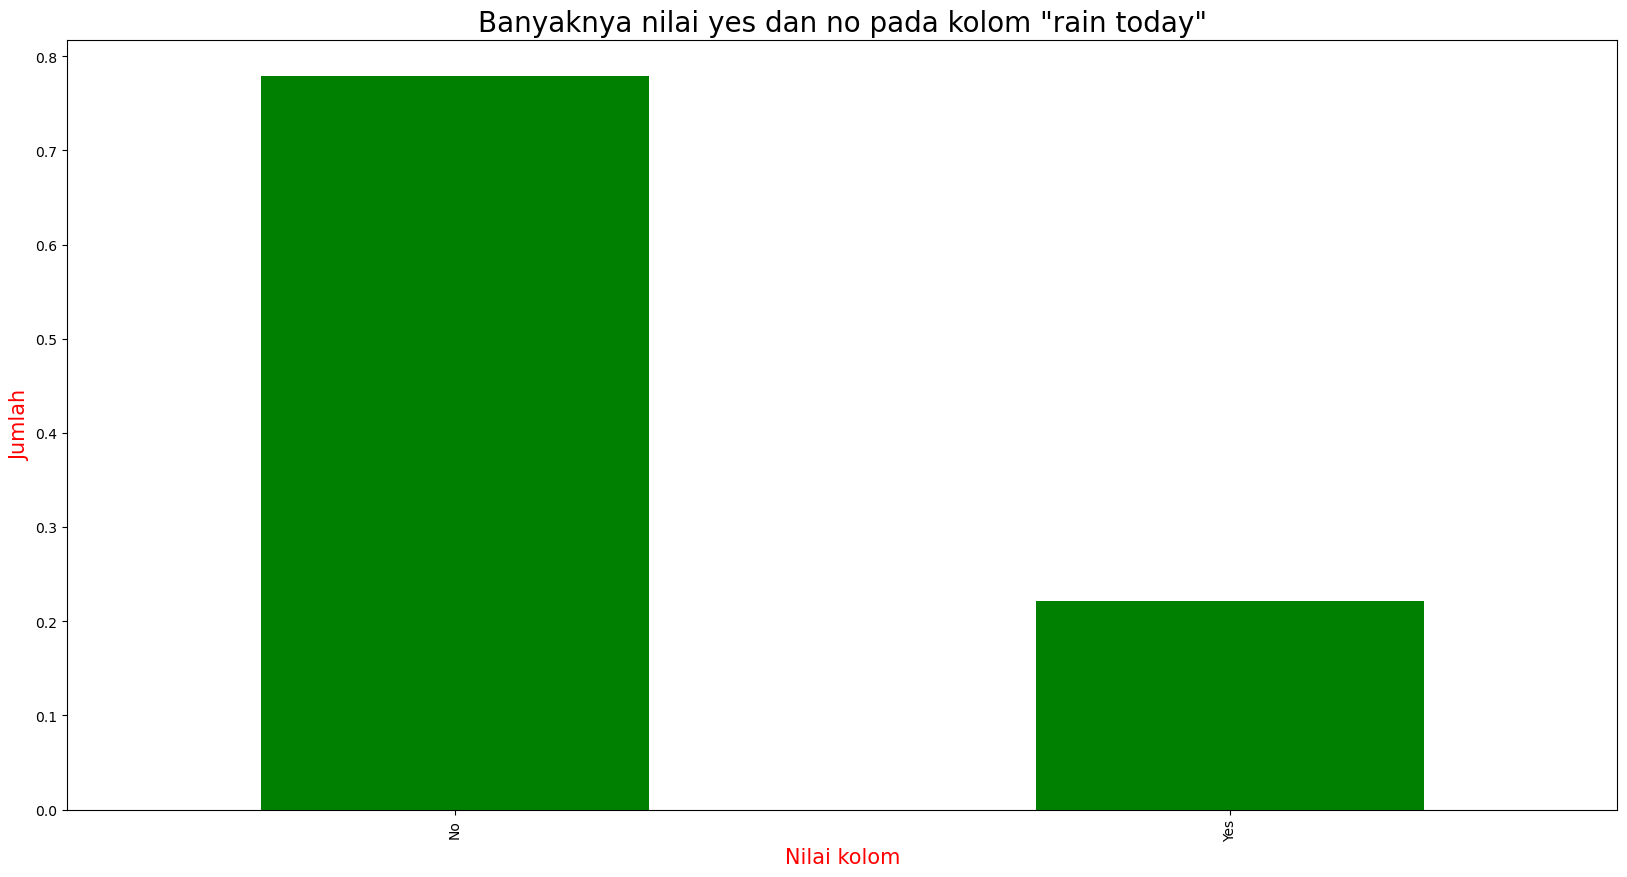

In [52]:
# inisiasi bentuk bar
rain_today_type.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Banyaknya nilai yes dan no pada kolom "rain today"', fontsize = 20)
# nama xlabel
plt.xlabel('Nilai kolom', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

#### Keterangan 
- Pada kolom rain today berisikan data yes dan no. yes mewakili hujan dan no tidak
- Presentase hujan sebesar 77.8%
- Presentase jumlah tidak hujan sebesar 22.2%
- Jika dibandingkan dengan presentase kolom rain tomorrow sebagai berikut :
    - Kolom rain tomorrow bernilai no berjumlah 77.6%
    - Kolom rain tomorrow bernilai yes berjumlah 22.4%
- Jumlah presentase rain tomorrow dan rain today sangatlah mirip jadi menurut kami data tersebut berkorelasi

# Kesimpulan EDA
Kolom kolom yang digunakan sebagai feature sebagai berikut :
- Rainfall
- Location
- WindGustSpeed
- MinTemp
- MaxTemp
- Rain Today


Kolom kolom tersebut dipilih sebagaimana alasan pada keterangan tiap analisa diatas

# Central of Tendency

In [53]:
mean_gustspeed = data_cleaning['WindGustSpeed'].mean()

print('Mean dari kolom price', mean_gustspeed)

Mean dari kolom price 39.987612489807


In [54]:
median_gustspeed = data_cleaning['WindGustSpeed'].median()

print('Median dari kolom price', median_gustspeed)

Median dari kolom price 39.0


In [55]:
mode_gustspeed = data_cleaning['WindGustSpeed'].mode()

print('Mode dari kolom name', mode_gustspeed)

Mode dari kolom name 0    40.03523
Name: WindGustSpeed, dtype: float64


### Distribusi Kolom Location

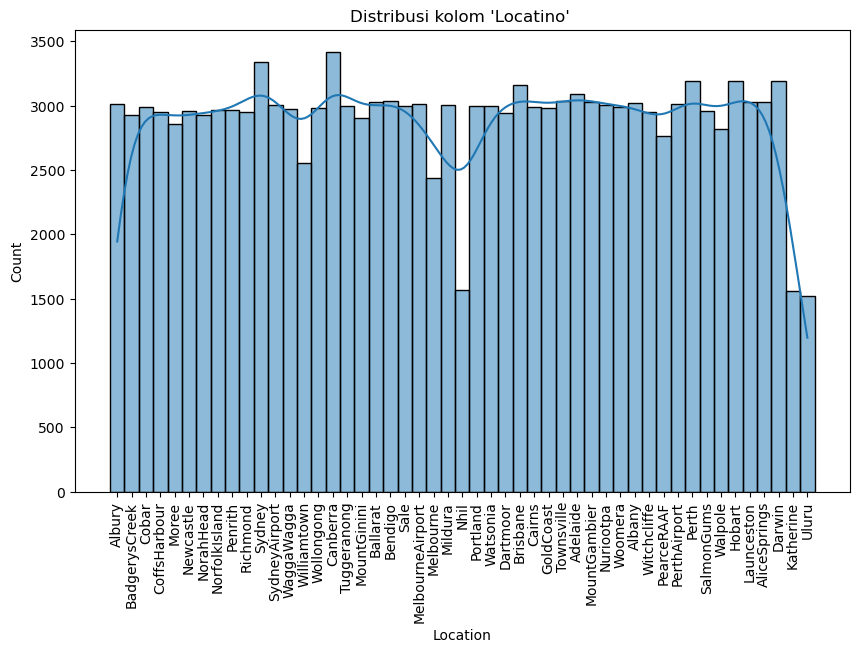

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(data=data_cleaning, x="Location", kde=True)
plt.title("Distribusi kolom 'Locatino' ")

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

plt.show()

# Data Preprocessing
Data preprocessing merupakan suatu proses untuk melakukan proses sebelum membuat sebuah model. Data data tersebut di proses berdasarkan explorasi data yang sebelumnya dilakukan. 

In [57]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  float64
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  float64
 8   WindDir3pm     142193 non-null  float64
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

Berdasarkan explorasi data sebelumnya ditentukan beberapa hal terpenting antara lain location, temp, wind, humidity, pressure, dan rain today Ketika data tersebut terdiri dari beberapa kolom dan kami menyimpulkan menjadi beberapa data sesuai dengan explorasi sebelumnya. 

    1. Location
         Kolom location merupakan kolom yang berisikan lokasi kejadian
    2. temp
         Pada kolom temp terdiri dari MinTemp, MaxTemp, Temp9am, dan Temp3pm. Temp yang memiliki korelasi tinggi yaitu MinTemp dan Maxtemp, dan temp9am serta temp3pm memiliki korelasi yang rendah. Akan tetapi Temp9am dan Temp3pm sudah cukup diwakilkan oleh Mintemp dan Maxtemp. Maka dari itu kolom MinTemp dan MaxTemp dijadikan sebagai feature
    3. Wind
       Pada kolom wind terdiri dari beberapa kolom yang mengandung unsur angin antara lain WindGustDir, WindGustSpeed, WinDir9am, WindDir9pm, WindSpeed9am, WindSpeed3pm. Kolom kolom tersebut yang memiliki korelasi tinggi yaitu WindGustSpeed. Sedangkan yang lain memiliki korelasi yang rendah. Maka dari itu kami memiliki WindGustSpeed untuk mewakili kolom yang memiliki unsur Wind
    4. Humidity
        Pada kolom tersebut memiliki 2 jenis yaitu humidity 9am dan humidity 3pm. Kolom tersebut memiliki korelasi yang lumayan akan tetapi pada kolom lain yang mirip seperti wind speed3pm dan unsur yang memiliki jam memiliki korelasi yang rendah sehingga kami tidak menjadikan kolom tersebut sebagai feature.
    5. Pressure
        Pada kolom pressure terdiri dari 2 jenis yaitu pressure9am dan pressure 3pm. Kolom tersebut memiliki korelasi yang rendah sehingga kami tidak menjadikan feature
    6. Rain Today
        Pada kolom rain today secara presentase menunjukkan hasil yang mirip dengan rain tomorrow sehingga kami menjadikan rain today sebagai feature
        
Feature : Location, Rainfall, WindGustSpeed, MinTemp, MaxTemp, Rain Today

In [58]:
data_modeling = data_cleaning.loc[:, ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RainToday', 'RainTomorrow']]
data_modeling

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,No,0
1,Albury,7.4,25.1,0.0,44.0,No,0
2,Albury,12.9,25.7,0.0,46.0,No,0
3,Albury,9.2,28.0,0.0,24.0,No,0
4,Albury,17.5,32.3,1.0,41.0,No,0
...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,31.0,No,0
145455,Uluru,2.8,23.4,0.0,31.0,No,0
145456,Uluru,3.6,25.3,0.0,22.0,No,0
145457,Uluru,5.4,26.9,0.0,37.0,No,0


# Encode

In [59]:
# find categorical variables
categoric = [var for var in data_modeling.columns if data_modeling[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categoric)))

print('The categorical variables are :', categoric)

There are 2 categorical variables

The categorical variables are : ['Location', 'RainToday']


In [60]:
# Menerapkan One Hot Encoding pada Variabel kategorik 
data_modeling = pd.get_dummies(data_modeling, columns=['Location', 'RainToday'], 
                            prefix=["loc", 'rain'], 
                            drop_first=True)
data_modeling

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainTomorrow,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,loc_Bendigo,loc_Brisbane,loc_Cairns,loc_Canberra,loc_Cobar,loc_CoffsHarbour,loc_Dartmoor,loc_Darwin,loc_GoldCoast,loc_Hobart,loc_Katherine,loc_Launceston,loc_Melbourne,loc_MelbourneAirport,loc_Mildura,loc_Moree,loc_MountGambier,loc_MountGinini,loc_Newcastle,loc_Nhil,loc_NorahHead,loc_NorfolkIsland,loc_Nuriootpa,loc_PearceRAAF,loc_Penrith,loc_Perth,loc_PerthAirport,loc_Portland,loc_Richmond,loc_Sale,loc_SalmonGums,loc_Sydney,loc_SydneyAirport,loc_Townsville,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,13.4,22.9,0.6,44.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,44.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,24.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Outlier

Text(0, 0.5, 'WindGustSpeed')

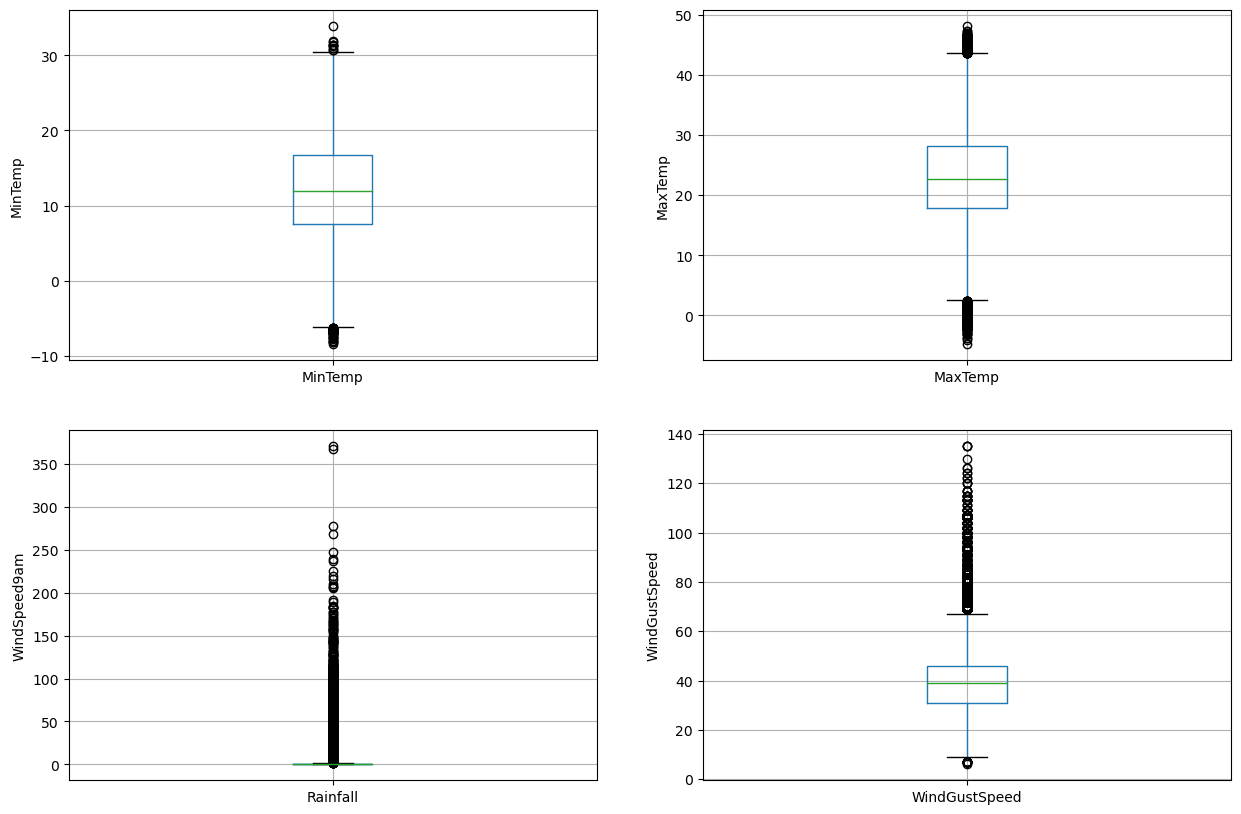

In [61]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_modeling.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 2)
fig = data_modeling.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')


plt.subplot(2, 2, 3)
fig = data_modeling.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data_modeling.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

### Outlier MinTemp

In [62]:
sorted(data_modeling['MinTemp'])

[-8.5,
 -8.2,
 -8.2,
 -8.0,
 -8.0,
 -7.8,
 -7.6,
 -7.6,
 -7.5,
 -7.5,
 -7.3,
 -7.2,
 -7.1,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -6.9,
 -6.9,
 -6.8,
 -6.8,
 -6.8,
 -6.7,
 -6.7,
 -6.7,
 -6.7,
 -6.7,
 -6.6,
 -6.6,
 -6.6,
 -6.6,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.4,
 -6.4,
 -6.4,
 -6.4,
 -6.4,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.3,
 -6.2,
 -6.2,
 -6.2,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.1,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.9,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.8,
 -5.7,
 -5.7,
 -5.7,
 -5.7,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.6,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.4,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.3,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.2,
 -5.1,

In [63]:
quantile1, quantile3= np.percentile(data_modeling['MinTemp'],[25,75])
## Find the IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 7.6
nilai quartile 3: 16.8
nilai iqr 9.200000000000001


In [64]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

print(lower_bound_val,upper_bound_val)

-6.200000000000001 30.6


In [65]:
#Menghitung data yang outlier pada limit bawah
(data_modeling['MinTemp'] < lower_bound_val).sum()

52

In [66]:
#Menghitung data yang outlier pada limit atas
(data_modeling['MinTemp'] > upper_bound_val).sum()

10

In [67]:
# Dilakukan filter pada data untuk membuang data yang outlier
model_no_outlier = data_modeling[(data_modeling['MinTemp']>lower_bound_val) & (data_modeling['MinTemp'] < upper_bound_val)]

### Outlier MaxTemp

In [68]:
sorted(data_modeling['MaxTemp'])

[-4.8,
 -4.1,
 -3.8,
 -3.7,
 -3.2,
 -3.1,
 -3.1,
 -3.0,
 -2.9,
 -2.7,
 -2.5,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.2,
 -2.2,
 -2.1,
 -2.1,
 -2.1,
 -2.0,
 -2.0,
 -1.9,
 -1.9,
 -1.8,
 -1.8,
 -1.7,
 -1.7,
 -1.7,
 -1.7,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.4,
 -1.4,
 -1.4,
 -1.4,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.3,
 -1.2,
 -1.2,
 -1.2,
 -1.2,
 -1.1,
 -1.1,
 -1.1,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.9,
 -0.9,
 -0.9,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.7,
 -0.7,
 -0.7,
 -0.7,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.5,
 -0.5,
 -0.5,
 -0.4,
 -0.4,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 

In [69]:
quantile1, quantile3= np.percentile(data_modeling['MaxTemp'],[25,75])
## Find the IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 17.9
nilai quartile 3: 28.2
nilai iqr 10.3


In [70]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

print(lower_bound_val,upper_bound_val)

2.4499999999999975 43.65


In [71]:
#Menghitung data yang outlier pada limit bawah
(data_modeling['MaxTemp'] < lower_bound_val).sum()

294

In [72]:
#Menghitung data yang outlier pada limit atas
(data_modeling['MaxTemp'] > upper_bound_val).sum()

165

In [73]:
# Dilakukan filter pada data untuk membuang data yang outlier
model_no_outlier = data_modeling[(data_modeling['MaxTemp']>lower_bound_val) & (data_modeling['MaxTemp'] < upper_bound_val)]

### Outlier Rainfall

In [74]:
sorted(data_modeling['Rainfall'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [75]:
quantile1, quantile3= np.percentile(data_modeling['Rainfall'],[25,75])
## Find the IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 0.0
nilai quartile 3: 0.8
nilai iqr 0.8


In [76]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

print(lower_bound_val,upper_bound_val)

-1.2000000000000002 2.0


In [77]:
#Menghitung data yang outlier pada limit bawah
(data_modeling['Rainfall'] < lower_bound_val).sum()

0

In [78]:
#Menghitung data yang outlier pada limit atas
(data_modeling['Rainfall'] > upper_bound_val).sum()

26634

In [79]:
# Dilakukan filter pada data untuk membuang data yang outlier
model_no_outlier = data_modeling[(data_modeling['Rainfall']>lower_bound_val) & (data_modeling['Rainfall'] < upper_bound_val)]

### Outlier WindGustSpeed

In [80]:
sorted(data_modeling['WindGustSpeed'])

[6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.

In [81]:
quantile1, quantile3= np.percentile(data_modeling['WindGustSpeed'],[25,75])
## Find the IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 31.0
nilai quartile 3: 46.0
nilai iqr 15.0


In [82]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

print(lower_bound_val,upper_bound_val)

8.5 68.5


In [83]:
#Menghitung data yang outlier pada limit bawah
(data_modeling['WindGustSpeed'] < lower_bound_val).sum()

19

In [84]:
#Menghitung data yang outlier pada limit atas
(data_modeling['WindGustSpeed'] > upper_bound_val).sum()

5367

In [85]:
# Dilakukan filter pada data untuk membuang data yang outlier
model_no_outlier = data_modeling[(data_modeling['WindGustSpeed']>lower_bound_val) & (data_modeling['WindGustSpeed'] < upper_bound_val)]

### Setelah Outlier Handling

Text(0, 0.5, 'WindGustSpeed')

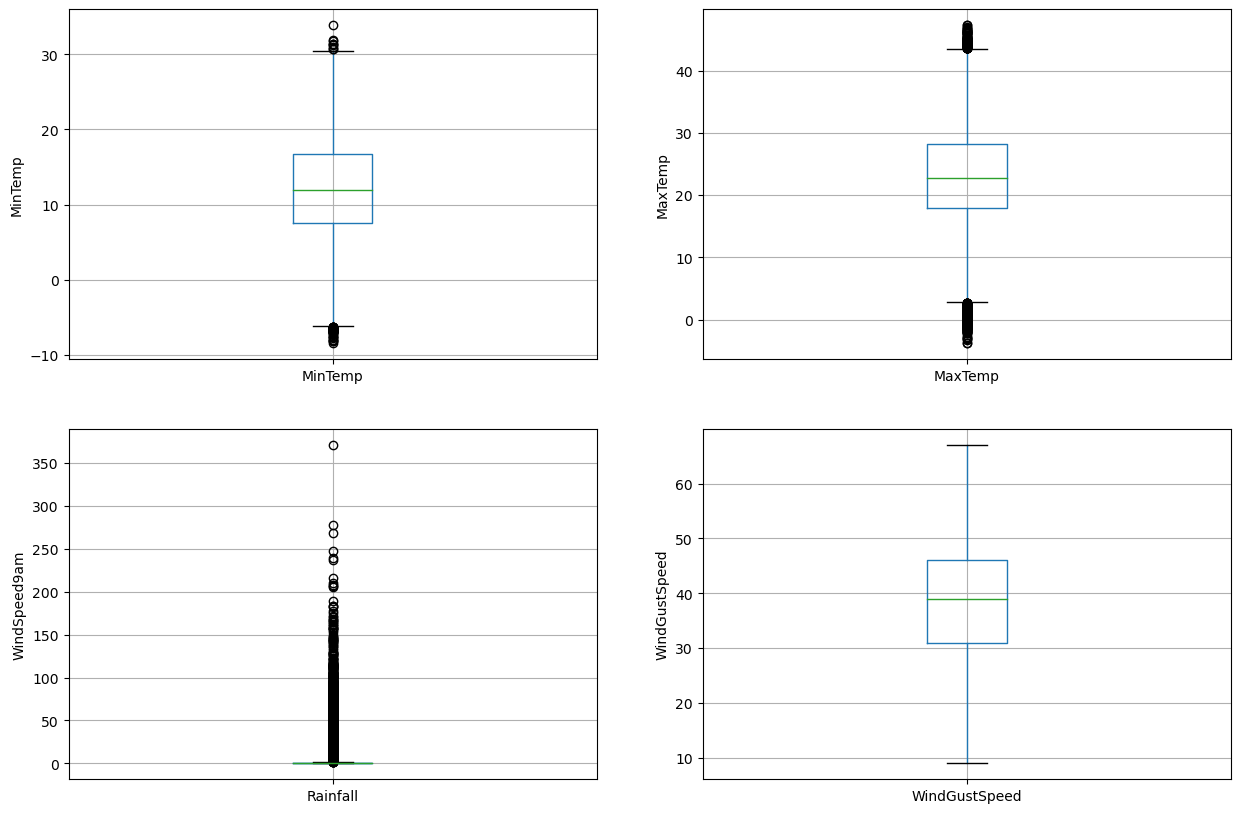

In [86]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = model_no_outlier.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 2)
fig = model_no_outlier.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')


plt.subplot(2, 2, 3)
fig = model_no_outlier.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = model_no_outlier.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

# Model

In [87]:
logistic = LogisticRegression()
svm = LinearSVC()

# Training Model

# SVM

In [88]:
x_svm = model_no_outlier.drop(['RainTomorrow',"Rainfall"], axis = 1)
y_svm = model_no_outlier['RainTomorrow']
# Training dan test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm ,y_svm, random_state=42, test_size=0.3)

In [89]:
#Training
svm.fit(x_train_svm, y_train_svm)

LinearSVC()

## Score Evaluasi SVM

In [90]:
predict_svm = svm.predict(x_test_svm)

In [91]:
akurasi_svm = accuracy_score(y_test_svm, predict_svm)
print('Accuracy score Test - Model SVM: {0:0.4f}'. format(akurasi_svm))

Accuracy score Test - Model SVM: 0.8061


In [92]:
print(confusion_matrix(y_test_svm, predict_svm))
print(classification_report(y_test_svm, predict_svm))
print(accuracy_score(y_test_svm, predict_svm))

[[31673   753]
 [ 7205  1412]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     32426
           1       0.65      0.16      0.26      8617

    accuracy                           0.81     41043
   macro avg       0.73      0.57      0.58     41043
weighted avg       0.78      0.81      0.76     41043

0.806105791486977


### Cross Validation

In [93]:
# Applying 5-Fold Cross Validation
score_cross_svm = cross_val_score(svm, x_train_svm, y_train_svm, cv = 5, scoring='accuracy')

# compute cross-validation score
print('Cross-validation scores:{}'.format(score_cross_svm))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(score_cross_svm.mean()))

Cross-validation scores:[0.80300736 0.80206756 0.79554117 0.78656085 0.3181391 ]
Average cross-validation score: 0.7011


### Confusion Matrix

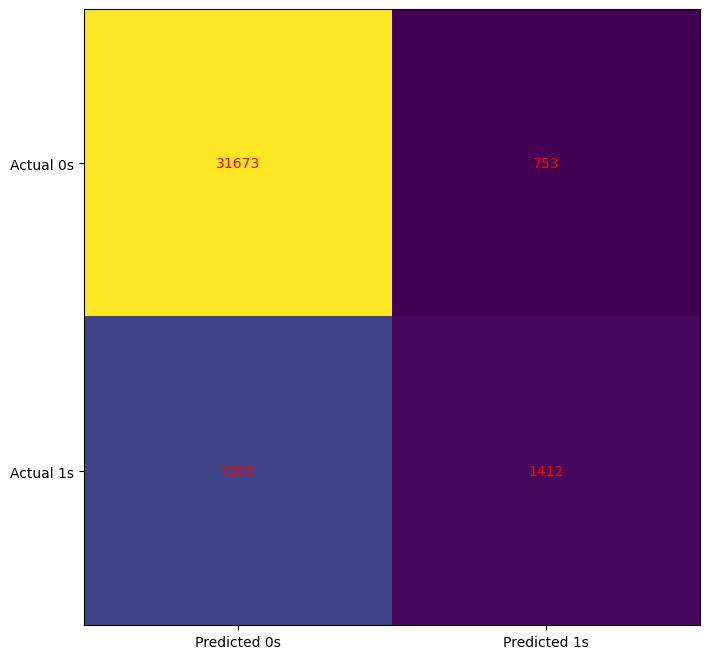

In [94]:
svm_confusion = confusion_matrix(y_test_svm, predict_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(svm_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_confusion[i, j], ha='center', va='center', color='red')
plt.show()

onfusion matrix diatas menunjukkan prediksi benar and  prediksi salah

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 31619


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1568


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 807 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 7049 `(Type II error)`

In [95]:
print('Ringkasan Evaluasi Model SVM')
print('Akurasi : {0:0.4f}'. format(akurasi_svm))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_svm,predict_svm)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_svm,predict_svm)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_svm,predict_svm)))

Ringkasan Evaluasi Model SVM
Akurasi : 0.8061
Presisi : 0.6522
Recall : 0.1639
F1 Score : 0.2619


# Logistic Regression

In [96]:
x_logistic = model_no_outlier.drop(['RainTomorrow',"Rainfall"], axis = 1)
y_logistic = model_no_outlier['RainTomorrow']
# Training dan test
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_logistic ,y_logistic, random_state=42, test_size=0.3)

In [97]:
#Training
logistic.fit(x_train_log,y_train_log)

LogisticRegression()

### Hasil Score Logistic Regression

In [98]:
predict_logistic = logistic.predict(x_test_log)

In [99]:
accuracy_score_logistic = accuracy_score(y_test_log,predict_logistic)
print('accuracy :', accuracy_score_logistic)

accuracy : 0.8106132592646736


In [100]:
print(classification_report(y_test_log,predict_logistic))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     32426
           1       0.61      0.28      0.38      8617

    accuracy                           0.81     41043
   macro avg       0.72      0.61      0.63     41043
weighted avg       0.78      0.81      0.78     41043



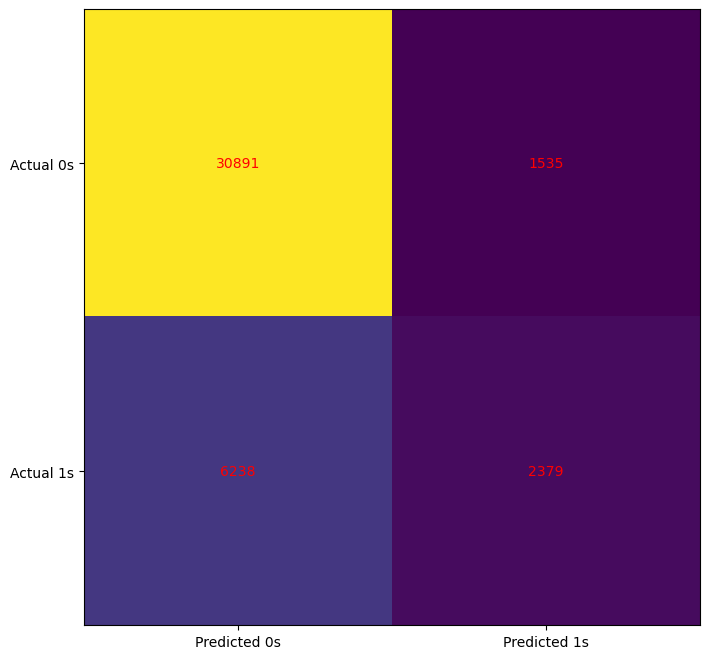

In [102]:
logistic_regression_confusion = confusion_matrix(y_test_log, predict_logistic)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_confusion[i, j], ha='center', va='center', color='red')
plt.show()

confusion matrix diatas menunjukkan `30962 + 2397  prediksi benar` and `6220 + 1465 prediksi salah`.

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 2379


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 30891


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1535 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 6238 `(Type II error)`

In [104]:
print('Ringkasan Evaluasi Model Logistic Regression')
print('Akurasi : {0:0.4f}'. format(accuracy_score_logistic))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_log, predict_logistic)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_log, predict_logistic)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_log, predict_logistic)))

Ringkasan Evaluasi Model Logistic Regression
Akurasi : 0.8106
Presisi : 0.6078
Recall : 0.2761
F1 Score : 0.3797


# PERBANDINGAN SVM DAN LOGISTIC REGRESSION

In [106]:
print('Ringkasan Evaluasi Model SVM')
print('Akurasi : {0:0.4f}'. format(akurasi_svm))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_svm,predict_svm)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_svm,predict_svm)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_svm,predict_svm)))

print('Ringkasan Evaluasi Model Logistic Regression')
print('Akurasi : {0:0.4f}'. format(accuracy_score_logistic))
print('Presisi : {0:0.4f}'. format(precision_score(y_test_log, predict_logistic)))
print('Recall : {0:0.4f}'. format( recall_score(y_test_log, predict_logistic)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test_log, predict_logistic)))

Ringkasan Evaluasi Model SVM
Akurasi : 0.8061
Presisi : 0.6522
Recall : 0.1639
F1 Score : 0.2619
Ringkasan Evaluasi Model Logistic Regression
Akurasi : 0.8106
Presisi : 0.6078
Recall : 0.2761
F1 Score : 0.3797


# Kesimpulan Hasil
   Berdasarkan hasil evaluasi model, dapat dilihat bahwa kedua model, baik model Regresi Logistik (LR) maupun model Support Vector Machine (SVM), memiliki nilai akurasi yang hampir sama yaitu untuk logistic regression senilai 81% dan SVM sebesar 80%. Selisih kedua model tersebut hanya berbeda sebesar 1%. Namun, pada nilai presisi dan recall, kedua model memiliki kekuatan yang berbeda dalam memprediksi kelas yang berbeda. Model SVM memiliki nilai presisi yang lebih tinggi dalam memprediksi kelas positif (fraud) dibandingkan dengan model Logistic, sementara model Logistic regression memiliki nilai recall yang lebih tinggi dalam memprediksi kelas positif.

   Pada kasus ini, performa model LR dan SVM cukup seimbang antara data train dan test dengan perbedaan skor yang tidak terlalu jauh. Oleh karena itu, dapat dikatakan bahwa model ini tidak mengalami overfitting atau underfitting. Namun, skor akurasi dan skor precision pada kedua model sudah cukup baik (> 0.6). Akan tetapi score recal dan F1 masih rendah

# Model Inference
Karena Logistic regressio lebih unggul jadi kami menggunakan logistic regresion sebagai model 

## Data Test

## Model Inference Logistic Regression

In [107]:
x_svm.head()

,MinTemp,MaxTemp,WindGustSpeed,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,loc_Bendigo,loc_Brisbane,loc_Cairns,loc_Canberra,loc_Cobar,loc_CoffsHarbour,loc_Dartmoor,loc_Darwin,loc_GoldCoast,loc_Hobart,loc_Katherine,loc_Launceston,loc_Melbourne,loc_MelbourneAirport,loc_Mildura,loc_Moree,loc_MountGambier,loc_MountGinini,loc_Newcastle,loc_Nhil,loc_NorahHead,loc_NorfolkIsland,loc_Nuriootpa,loc_PearceRAAF,loc_Penrith,loc_Perth,loc_PerthAirport,loc_Portland,loc_Richmond,loc_Sale,loc_SalmonGums,loc_Sydney,loc_SydneyAirport,loc_Townsville,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,13.4,22.9,44.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,44.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,46.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,24.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,41.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
test_logistic = {'MinTemp':[20, 18.3, 11, 13.3],
         'MaxTemp':[28, 30, 32, 21],
         'WindGustSpeed':[33, 50, 90, 20],
         
         'loc_Albany': [0, 0, 0, 0],
         'loc_Albury': [0, 0, 0, 0],
         'loc_AliceSprings': [0, 0, 0, 0],
         'loc_BadgerysCreek': [0, 0, 0, 0],
         'loc_Ballarat': [0, 0, 0, 0],
         'loc_Bendigo': [0, 0, 0, 0],
         'loc_Brisbane': [0, 0, 0, 0],
         'loc_Brisbane': [0, 0, 0, 0],
         'loc_Cairns': [0, 0, 0, 0],
         'loc_Canberra': [0, 0, 0, 0],
         'loc_Cobar': [0, 0, 0, 0],
         'loc_CoffsHarbour': [0, 0, 0, 0],
         'loc_Dartmoor': [0, 0, 0, 0],
         'loc_Darwin': [0, 0, 0, 0],
         'loc_GoldCoast': [0, 0, 0, 0],
         'loc_Hobart': [0, 0, 0, 0],
         'loc_Katherine': [0, 0, 0, 0],
         'loc_Launceston': [0, 0, 0, 0],
         'loc_Melbourne': [0, 0, 0, 0],
         'loc_MelbourneAirport': [0, 0, 0, 0],
         'loc_Mildura': [0, 0, 0, 0],
         'loc_Moree': [0, 0, 0, 0],
         'loc_MountGambier': [0, 0, 0, 0],
         'loc_MountGinini': [0, 0, 0, 0],
         'loc_Newcastle': [0, 0, 0, 0],
         'loc_Nhil': [0, 0, 0, 0],
         'loc_NorahHead': [0, 0, 0, 0],
         'loc_NorfolkIsland' : [0, 0, 0, 0], 
         'loc_Nuriootpa'  : [0, 0, 0, 0],
         'loc_PearceRAAF'  : [0, 0, 0, 0],
         'loc_Penrith'  : [0, 0, 0, 0],
         'loc_Perth'  : [0, 0, 0, 0],
         'loc_PerthAirport'  : [0, 0, 0, 0],
         'loc_Portland'  : [0, 0, 0, 0],
         'loc_Richmond'  : [0, 0, 0, 0],
         'loc_Sale'  : [0, 0, 0, 0],
         'loc_SalmonGums'  : [0, 0, 0, 0],
         'loc_Sydney'  : [0, 0, 0, 0],
         'loc_SydneyAirport' : [0, 0, 0, 0], 
         'loc_Townsville'  : [0, 0, 0, 0],
         'loc_Tuggeranong'  : [0, 0, 0, 0],
         'loc_Uluru'  : [0, 0, 0, 0],
         'loc_WaggaWagga'  : [0, 0, 0, 0],
         'loc_Walpole'  : [0, 0, 0, 0],
         'loc_Watsonia'  : [0, 0, 0, 0],
         'loc_Williamtown'  : [1, 0, 0, 0],
         'loc_Witchcliffe'  : [0, 1, 0, 0],
         'loc_Wollongong'  : [0, 0, 1, 0],
         'loc_Woomera'  : [0, 0, 0, 1],
         'rain_Yes' : [0, 1, 0, 1]
        }
         
         
        
test_logistic = pd.DataFrame(test_logistic)
test_logistic

,MinTemp,MaxTemp,WindGustSpeed,loc_Albany,loc_Albury,loc_AliceSprings,loc_BadgerysCreek,loc_Ballarat,loc_Bendigo,loc_Brisbane,loc_Cairns,loc_Canberra,loc_Cobar,loc_CoffsHarbour,loc_Dartmoor,loc_Darwin,loc_GoldCoast,loc_Hobart,loc_Katherine,loc_Launceston,loc_Melbourne,loc_MelbourneAirport,loc_Mildura,loc_Moree,loc_MountGambier,loc_MountGinini,loc_Newcastle,loc_Nhil,loc_NorahHead,loc_NorfolkIsland,loc_Nuriootpa,loc_PearceRAAF,loc_Penrith,loc_Perth,loc_PerthAirport,loc_Portland,loc_Richmond,loc_Sale,loc_SalmonGums,loc_Sydney,loc_SydneyAirport,loc_Townsville,loc_Tuggeranong,loc_Uluru,loc_WaggaWagga,loc_Walpole,loc_Watsonia,loc_Williamtown,loc_Witchcliffe,loc_Wollongong,loc_Woomera,rain_Yes
0,20.0,28,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,18.3,30,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,11.0,32,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13.3,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [109]:
predict_logistic_test = logistic.predict(test_logistic)
predict_logistic_test

array([0, 0, 0, 0])

## Kesimpulan Model Inference Logistic Regression
Pada model inference berisikan data data acak yang sesuai dengan data pada data_modeling. Data tersebut kemudian dicoba menggunakan predict logistic regression dan dihasilkan nilai 0 atau tidak hujan pada hari besok pada pengujian tersebut

# Kesimpulan SVM dan Logistic Regression Pada data weatherAUS
Pada hal hal yang dilakukan pada data weatherAUS didapatkan beberapa hal sebagai berikut. 
- data weatherAUS terdiri dari berbagai macam jenis yang menjadikan pengaruh pengaruh hujan pada wilayah australia. Data tersebut kemudian diolah dan dicari mana yang digunakan sebagai feature.
- Berdasarkan Hasil analisa EDA disimpulkan bahwa data data yang tidak memiliki korelasi yang tinggi tidak digunakan dan data data yang memiliki korelasi yang tinggi digunakan sebagai feature.
- Hasil score SVM sebesar 80%
- Hasil score Logistic Regression 81%
- Hasil nilai score antara SVM dan Logistic Regresi hanya berbeda 1 persen
- Pada pengujian dengan model inference didapatkan hasil [0, 0, 0 ,0] yaitu tidak hujan pada kedua data tersebut. 

Berdasarkan pengujian, hasil logistic regression lebih unggul 1% dibandigkan SVM pada data weatherAUS

# SELESAI